<a href="https://colab.research.google.com/github/NarendarB0152/ProjectNo4/blob/main/ProjectNo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
device="/device:CPU:0"

In [3]:
import zipfile
z=zipfile.ZipFile('/content/Trash-Classifier-in-Python-using-Tensorflow.zip')
z.extractall()

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
dir_example="Trash-Classifier-in-Python-using-Tensorflow/Data"
classes=os.listdir(dir_example)
print(classes)

['Train', 'Test']


In [5]:
dir_example="Trash-Classifier-in-Python-using-Tensorflow/Data/Train"
train_classes=os.listdir(dir_example)
print(train_classes)

['plastic', 'trash', 'cardboard', 'metal', 'paper', 'glass']


In [6]:
dir_example="Trash-Classifier-in-Python-using-Tensorflow/Data/Test"
test_classes=os.listdir(dir_example)
print(test_classes)

['plastic', 'trash', 'cardboard', 'metal', 'paper', 'glass']


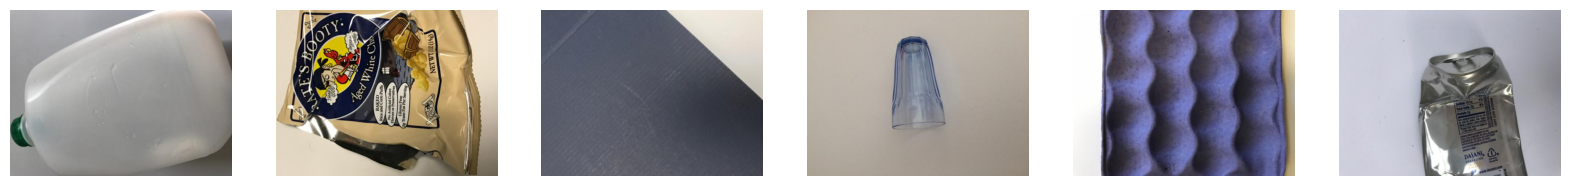

In [7]:
dir_with_examples="Trash-Classifier-in-Python-using-Tensorflow/visualize"
files_per_row=6
files_in_dir=os.listdir(dir_with_examples)
number_of_cols=files_per_row
number_of_rows=int(len(files_in_dir)/number_of_cols)
# print(number_of_rows)
fig,axs=plt.subplots(number_of_rows,number_of_cols)
fig.set_size_inches(20,15,forward=True)

try:
  for i in range(0,len(files_in_dir)):
    file_name=files_in_dir[i]
    image=Image.open(f'{dir_with_examples}/{file_name}')
    row=math.floor(i/files_per_row)
    col=i%files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
plt.show()


In [8]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train='Trash-Classifier-in-Python-using-Tensorflow/Data/Train'
test='Trash-Classifier-in-Python-using-Tensorflow/Data/Test'

In [10]:
train_generator=ImageDataGenerator(rescale=1/255)
train_generator=train_generator.flow_from_directory(train,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='sparse')
labels=(train_generator.class_indices)
print(labels,'\n')

labels=dict((v,k) for k,v in labels.items())
print(labels)

Found 2186 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [12]:
for image_batch,label_batch in train_generator:
  break;
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [13]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [14]:
print(train_generator.class_indices)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [15]:
Labels='\n'.join(sorted(train_generator.class_indices.keys()))
with open('Label.txt','w') as file:
  file.write(Labels)

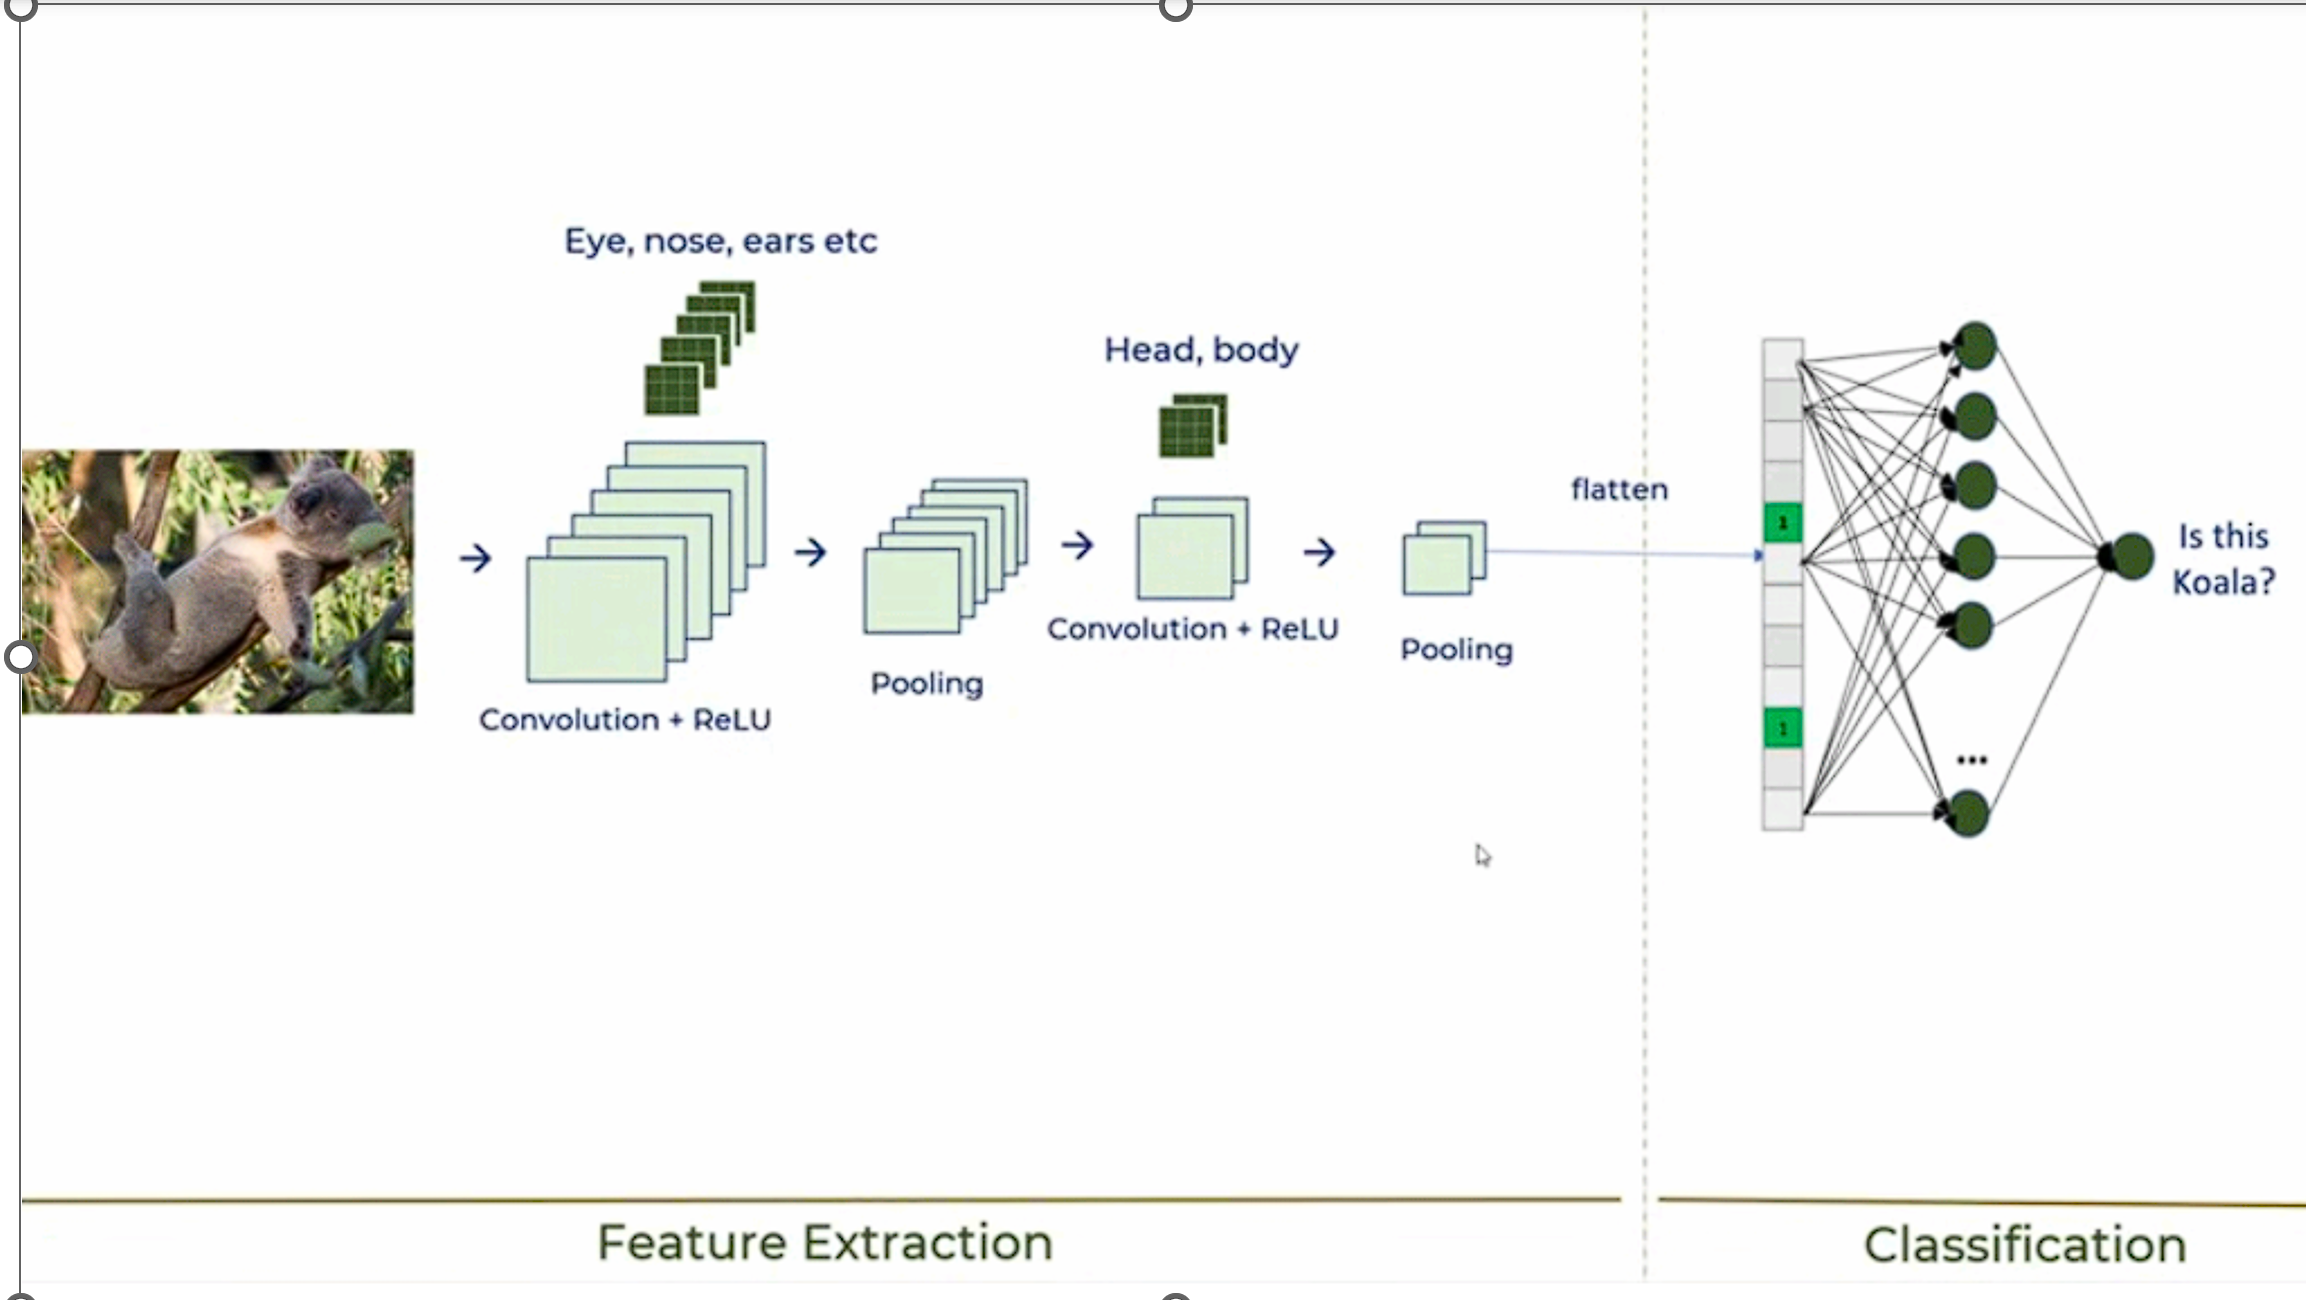

In [16]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="same",input_shape=(300,300,3),activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,803,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,843,910 (10.85 MB)

 Trainable params: 2,843,910 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - accuracy: 0.2324 - loss: 1.8073
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - accuracy: 0.2812 - loss: 1.6748
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.3322 - loss: 1.6009
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.4062 - loss: 1.4192
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.4354 - loss: 1.3934
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - accuracy: 0.4375 - loss: 1.6123
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.5012 - loss: 1.3060
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step - accuracy: 0.4375 - loss: 1.3608
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.5367 - loss: 1.1943
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - accuracy: 0.5938 - loss: 1.0573


In [19]:
import keras.utils as ku
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Probability: 0.7489258
Classified: paper 

Probability: 0.7489258


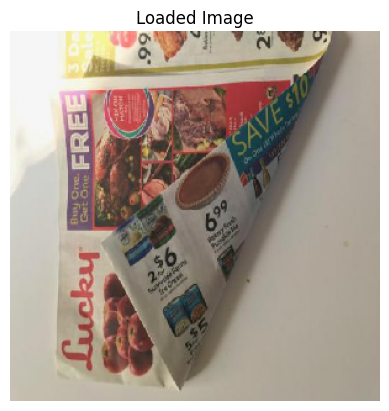

In [20]:
test_img='Trash-Classifier-in-Python-using-Tensorflow/Data/Test/paper/paper522.jpg'
img=ku.load_img(test_img,target_size=(300,300))
img=ku.img_to_array(img,dtype=np.uint8)
img=np.array(img)/255.0
prediction=model.predict(img[np.newaxis,...])
test_img = 'Trash-Classifier-in-Python-using-Tensorflow/Data/Test/paper/paper522.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
print("Probability:",np.max(prediction[0],axis=-1))
predicted_class=labels

In [23]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 6.31 %
GLASS : 1.38 %
METAL : 14.4 %
PAPER : 74.89 %
PLASTIC : 0.99 %
TRASH : 2.03 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probability: 0.56044525
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

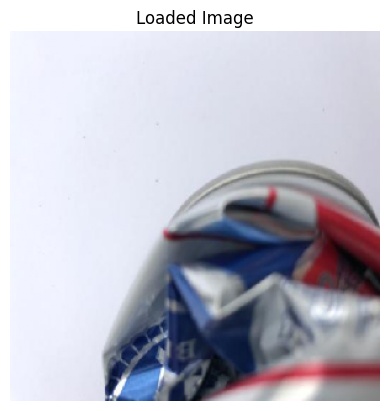

In [24]:
test_img = 'Trash-Classifier-in-Python-using-Tensorflow/Data/Test/metal/metal386.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [25]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 1.59 %
GLASS : 14.82 %
METAL : 6.72 %
PAPER : 20.65 %
PLASTIC : 56.04 %
TRASH : 0.17 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probability: 0.6883409
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

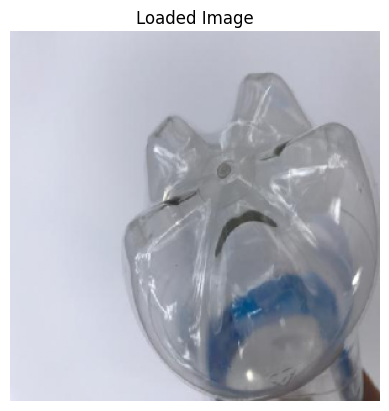

In [26]:
test_img = 'Trash-Classifier-in-Python-using-Tensorflow/Data/Test/plastic/plastic430.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [27]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 1.09 %
GLASS : 15.07 %
METAL : 2.63 %
PAPER : 12.29 %
PLASTIC : 68.83 %
TRASH : 0.08 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probability: 0.98082584
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

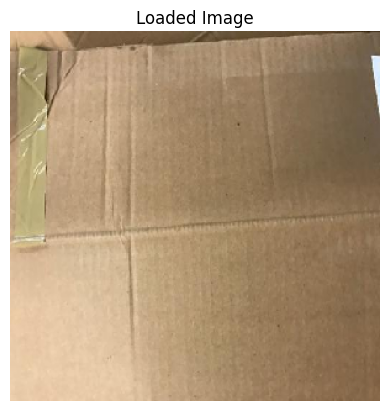

In [28]:
test_img = 'Trash-Classifier-in-Python-using-Tensorflow/Data/Test/cardboard/cardboard355.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [29]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 98.08 %
GLASS : 0.76 %
METAL : 0.25 %
PAPER : 0.45 %
PLASTIC : 0.44 %
TRASH : 0.02 %


In [30]:
model.save('modelnew.h5')